In [1]:
from math import sqrt
from sklearn import datasets
import numpy as np

In [2]:
def euclidean_distance(instance1, instance2):
    return sqrt((instance1[0]-instance2[0])**2 + (instance1[1]-instance2[1])**2 + (instance1[2]-instance2[2])**2
        + (instance1[3]-instance2[3])**2)

In [3]:
def mean(data):
    return float(sum(data)) / max(len(data), 1)

In [4]:
def make_distance_matrix(array):
    distance_matrix = []
    for i in range(0, len(array)):
        distance_matrix.append([])
        for j in range (0, len(array)):
            distance_matrix[i].append(euclidean_distance(array[i], array[j]))
    return distance_matrix

In [5]:
### Making Datasets
iris = datasets.load_iris()

data_dummy =  np.asarray([[2,3,4,5],[1,2,3,2],[3,3,3,4],[5,4,3,2]])
cluster_list = [[0],[1],[2],[3]]

In [6]:
def cluster_list_initiate(data_length):
    cluster_list = []
    for i in range(0,data_length):
        cluster_list.append([i])
    return cluster_list

In [7]:
def min_distance(distance_matrix):
    idx_min = []
    min_distance = distance_matrix[0][1]
    for i in range(0, len(distance_matrix)):
        for j in range(0,len(distance_matrix)):
            if i != j and distance_matrix[i][j] < min_distance :
                min_distance = distance_matrix[i][j]
                idx_min = [i,j]
    if len(idx_min) == 0:
        idx_min.append(0)
        idx_min.append(1)
        
    print(idx_min)
    return idx_min

In [8]:
def merge_cluster(distance_matrix,cluster_list,affinity,idx_min):
    result = []
    for i in range (0, len(cluster_list[idx_min[1]])):
        cluster_list[idx_min[0]].append(cluster_list[idx_min[1]][i])
    cluster_list.pop(idx_min[1])
    print(cluster_list)
    
    result.append(cluster_list)
    
    n_matrix = len(distance_matrix)
    
    # Initiate update_distance_matrix
    update_distance_matrix = [0] * n_matrix
    for i in range(0, n_matrix):
        update_distance_matrix[i] = [0] * n_matrix
    
    # Calculate with single linkage
    for i in range(0, n_matrix):
        for j in range(0, n_matrix):
            if i != idx_min[0] and i != idx_min[1] and j == idx_min[0]:
                if affinity == "single":
                    update_distance_matrix[i][idx_min[0]] = min(distance_matrix[i][idx_min[0]], distance_matrix[i][idx_min[1]])
                if affinity == "complete":
                    update_distance_matrix[i][idx_min[0]] = max(distance_matrix[i][idx_min[0]], distance_matrix[i][idx_min[1]])
                if affinity == "average":
                    update_distance_matrix[i][idx_min[0]] = mean([distance_matrix[i][idx_min[0]], distance_matrix[i][idx_min[1]]])                    
            else:
                update_distance_matrix[i][j] = distance_matrix[i][j]

    # Delete 2nd merged row and column           
#     print(update_distance_matrix)
    for i in range(0, n_matrix):
        # Delete column
        update_distance_matrix[i].pop(idx_min[1])
    
    # Delete row
    update_distance_matrix.pop(idx_min[1])
    
    # Update merged 1st row
    n_matrix = len(update_distance_matrix)
    for i in range(0, n_matrix):
        if i != idx_min[0]:
            update_distance_matrix[idx_min[0]][i] = update_distance_matrix[i][idx_min[0]]
    
#     print(update_distance_matrix)
#     print(n_matrix)
#     print(len(update_distance_matrix))
    
    result.append(update_distance_matrix)
    return result
                

In [198]:
def single_link_update_matrix(distance_matrix, idx_min):
    return 0

In [127]:
def complete_link_update_matrix(distance_matrix):
    return 0

In [86]:
def average_group_link_update_matrix(distance_matrix):
    return 0

In [224]:
def AGGLO_predict(data, affinity,n_cluster):
    distance_matrix = make_distance_matrix(data)
    cluster_list = cluster_list_initiate(len(data))
    
    for i in range (0, len(distance_matrix)-n_cluster):
        idx_min = min_distance(distance_matrix)
        result = merge_cluster(distance_matrix,cluster_list,affinity,idx_min)
        cluster_list = result[0]
        distance_matrix = result[1]
        
    return cluster_list

In [225]:
AGGLO_predict(iris.data,'average', 3)

[101, 142]
[[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19], [20], [21], [22], [23], [24], [25], [26], [27], [28], [29], [30], [31], [32], [33], [34], [35], [36], [37], [38], [39], [40], [41], [42], [43], [44], [45], [46], [47], [48], [49], [50], [51], [52], [53], [54], [55], [56], [57], [58], [59], [60], [61], [62], [63], [64], [65], [66], [67], [68], [69], [70], [71], [72], [73], [74], [75], [76], [77], [78], [79], [80], [81], [82], [83], [84], [85], [86], [87], [88], [89], [90], [91], [92], [93], [94], [95], [96], [97], [98], [99], [100], [101, 142], [102], [103], [104], [105], [106], [107], [108], [109], [110], [111], [112], [113], [114], [115], [116], [117], [118], [119], [120], [121], [122], [123], [124], [125], [126], [127], [128], [129], [130], [131], [132], [133], [134], [135], [136], [137], [138], [139], [140], [141], [143], [144], [145], [146], [147], [148], [149]]
[7, 39]
[[0], [1], [2], [3], [4], [5], [6], [7, 39

[0, 32]
[[0, 17, 40], [1, 45], [2], [3, 47], [4, 37], [5], [6], [7, 39], [8, 38], [9, 34], [10, 48], [11], [12], [13], [14], [15], [16], [18], [19, 21], [20], [22], [23], [24], [25], [26], [27, 28], [29, 30], [31], [32], [33], [35], [36], [41], [42], [43], [44], [46], [49], [50], [51], [52], [53], [54], [55], [56], [57, 93], [58], [59], [60], [61], [62], [63, 91], [64], [65, 75], [66], [67], [68], [69], [70], [71], [72], [73], [74], [76], [77], [78], [79], [80, 81], [82, 92], [83], [84], [85], [86], [87], [88], [89], [90], [94], [95, 96], [97], [98], [99], [100], [101, 142], [102], [103], [104], [105], [106], [107], [108], [109], [110], [111], [112], [113], [114], [115], [116, 137], [117], [118], [119], [120], [121], [122], [123], [124], [125], [126], [127, 138], [128, 132], [129], [130], [131], [133], [134], [135], [136], [139], [140], [141], [143], [144], [145], [146], [147], [148], [149]]
[7, 37]
[[0, 17, 40], [1, 45], [2], [3, 47], [4, 37], [5], [6], [7, 39, 49], [8, 38], [9, 34], 

[42, 55]
[[0, 17, 40, 4, 37, 7, 39, 49, 27, 28], [1, 45, 12, 9, 34, 25], [2, 3, 47], [5], [6], [8, 38, 42], [10, 48], [11, 29, 30], [13], [14], [15], [16], [18], [19, 21, 46], [20], [22], [23, 26, 43], [24], [31], [32], [33], [35], [36], [41], [44], [50], [51], [52], [53, 89], [54, 58], [55], [56], [57, 93], [59], [60], [61], [62], [63, 91, 78], [64], [65, 75], [66, 84], [67, 82, 92], [68, 87], [69, 80, 81], [70, 127, 138], [71], [72], [73], [74, 97], [76], [77], [79], [83], [85], [86], [88, 95, 96, 94, 99], [90], [98], [100], [101, 142], [102], [103, 116, 137], [104], [105], [106], [107], [108], [109], [110, 147], [111], [112, 139], [113], [114], [115], [117], [118], [119], [120, 143], [121], [122], [123, 126], [124], [125], [128, 132], [129], [130], [131], [133], [134], [135], [136, 148], [140, 144], [141, 145], [146], [149]]
[59, 71]
[[0, 17, 40, 4, 37, 7, 39, 49, 27, 28], [1, 45, 12, 9, 34, 25], [2, 3, 47], [5], [6], [8, 38, 42], [10, 48], [11, 29, 30], [13], [14], [15], [16], [18]

[[0,
  17,
  40,
  4,
  37,
  7,
  39,
  49,
  27,
  28,
  10,
  48,
  19,
  21,
  46,
  20,
  31,
  36,
  23,
  26,
  43,
  24,
  44,
  5,
  18,
  16,
  32,
  33,
  14,
  15,
  1,
  45,
  12,
  9,
  34,
  25,
  35,
  2,
  3,
  47,
  6,
  11,
  29,
  30,
  8,
  38,
  42,
  13,
  22,
  41],
 [50,
  52,
  86,
  76,
  77,
  54,
  58,
  65,
  75,
  51,
  56,
  85,
  61,
  71,
  74,
  97,
  63,
  91,
  78,
  73,
  55,
  90,
  66,
  84,
  70,
  127,
  138,
  149,
  101,
  142,
  113,
  121,
  114,
  72,
  83,
  133,
  123,
  126,
  146,
  119,
  134,
  62,
  68,
  87,
  53,
  89,
  69,
  80,
  81,
  67,
  82,
  92,
  88,
  95,
  96,
  94,
  99,
  59,
  64,
  79,
  57,
  93,
  98,
  60,
  106],
 [100,
  110,
  147,
  112,
  139,
  141,
  145,
  115,
  136,
  148,
  120,
  143,
  140,
  144,
  124,
  103,
  116,
  137,
  111,
  104,
  128,
  132,
  108,
  102,
  125,
  129,
  107,
  130,
  135,
  105,
  122,
  118,
  109,
  117,
  131]]

In [76]:
# from sklearn import datasets
# from sklearn.cluster import AgglomerativeClustering
# from sklearn.metrics import accuracy_score
# import matplotlib.pyplot as plt
# import numpy as np

In [46]:
# plt.figure(figsize=(50, 50))

<Figure size 3600x3600 with 0 Axes>

<Figure size 3600x3600 with 0 Axes>

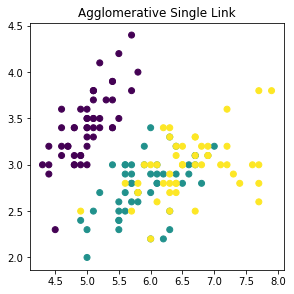

In [54]:
# ###Import Data Iris
# iris = datasets.load_iris()
# data = iris.data
# target = iris.target

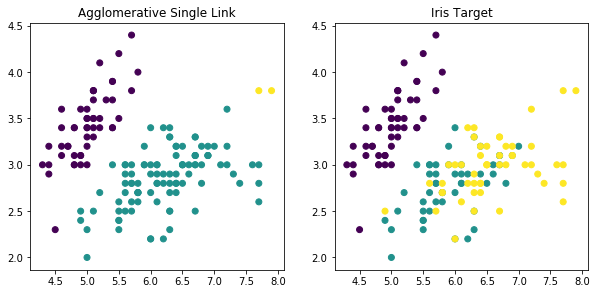

Accuracy :  0.68


In [77]:
# ###Agglomerative Single Link
# single = AgglomerativeClustering(n_clusters=3, linkage='single').fit_predict(data)
# singlelabels = np.choose(single,[1,0,2])

# ###Plot the Agglomerative Single Link Prediction
# plt.subplot(221)
# plt.scatter(data[:, 0], data[:, 1], c=singlelabels)
# plt.rcParams["figure.figsize"] = [10,10]
# plt.title("Agglomerative Single Link")

# ###Plot the Actual Label Target
# plt.subplot(222)
# plt.scatter(data[:, 0], data[:, 1], c=target)
# plt.rcParams["figure.figsize"] = [10,10]
# plt.title("Iris Target")
# plt.show()

# ###Print Model Accuracy
# accuracy = accuracy_score(target, singlelabels)
# print("Accuracy : ", accuracy)

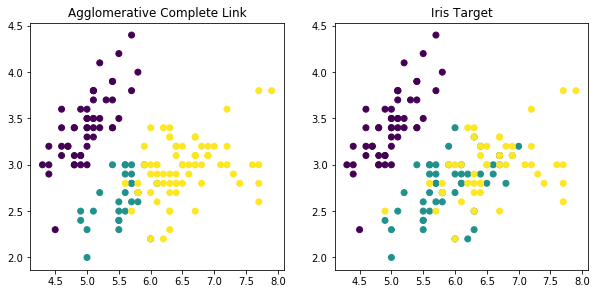

Accuracy :  0.84


In [78]:
# ###Agglomerative Complete Link
# complete = AgglomerativeClustering(n_clusters=3, linkage='complete').fit_predict(data)
# completelabels = np.choose(complete,[2,0,1])

# ###Plot the Agglomerative Complete Link Prediction
# plt.subplot(221)
# plt.scatter(data[:, 0], data[:, 1], c=completelabels)
# plt.rcParams["figure.figsize"] = [10,10]
# plt.title("Agglomerative Complete Link")

# ###Plot the Actual Label Target
# plt.subplot(222)
# plt.scatter(data[:, 0], data[:, 1], c=target)
# plt.rcParams["figure.figsize"] = [10,10]
# plt.title("Iris Target")
# plt.show()

# ###Print Model Accuracy
# accuracy = accuracy_score(target, completelabels)
# print("Accuracy : ", accuracy)

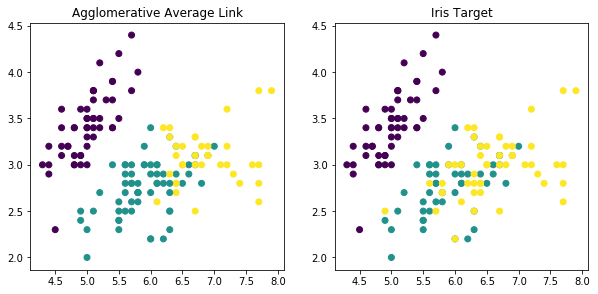

Accuracy :  0.9066666666666666


In [79]:
# ###Agglomerative Average Link
# average = AgglomerativeClustering(n_clusters=3, linkage='average').fit_predict(data)
# averagelabels = np.choose(average,[1,0,2])

# ###Plot the Agglomerative Average Link Prediction
# plt.subplot(221)
# plt.scatter(data[:, 0], data[:, 1], c=averagelabels)
# plt.rcParams["figure.figsize"] = [10,10]
# plt.title("Agglomerative Average Link")

# ###Plot the Actual Label Target
# plt.subplot(222)
# plt.scatter(data[:, 0], data[:, 1], c=target)
# plt.rcParams["figure.figsize"] = [10,10]
# plt.title("Iris Target")
# plt.show()

# ###Print Model Accuracy
# accuracy = accuracy_score(target, averagelabels)
# print("Accuracy : ", accuracy)

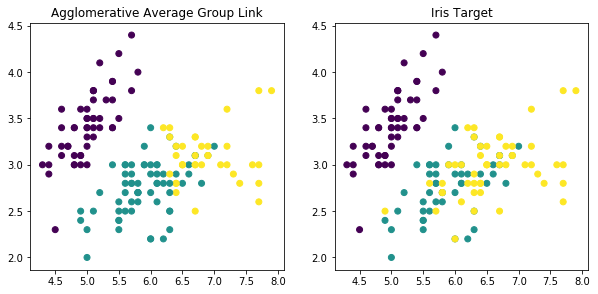

Accuracy :  0.8933333333333333


In [80]:
# ###Agglomerative Average Group Link
# ward = AgglomerativeClustering(n_clusters=3, linkage='ward').fit_predict(data)
# wardlabels = np.choose(ward,[1,0,2])

# ###Plot the Agglomerative Group Average Link Prediction
# plt.subplot(221)
# plt.scatter(data[:, 0], data[:, 1], c=wardlabels)
# plt.rcParams["figure.figsize"] = [10,10]
# plt.title("Agglomerative Average Group Link")

# ###Plot the Actual Label Target
# plt.subplot(222)
# plt.scatter(data[:, 0], data[:, 1], c=target)
# plt.rcParams["figure.figsize"] = [10,10]
# plt.title("Iris Target")
# plt.show()

# ###Print Model Accuracy
# accuracy = accuracy_score(target, wardlabels)
# print("Accuracy : ", accuracy)